# Linear Regression with Boston Housing Data 



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Multicollinearity with Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
raw = pd.read_csv('data/Boston.csv')

In [4]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Issues in Data 

1. Bunch of values of MEDV capped at 50.0 (need to remove)
2. Bunch of outliers in TAX (past 600, need to remove)
3. Variance Inflation Factor between TAX and RAD (need to remove 1)

Since TAX has two issue points, instead of subsetting the outlier values out, let's just remove TAX variable after checking VIF. 



In [11]:
# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


#print(checking_vif(X_train))

### Outliers in TAX 



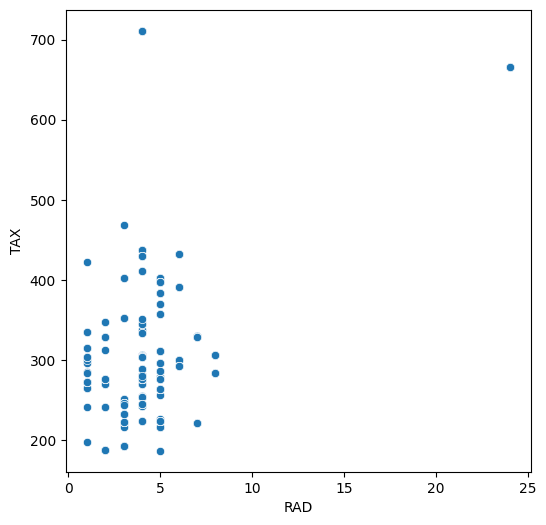

In [6]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = raw)

plt.show()

### MEDV Artificially Capped at 50

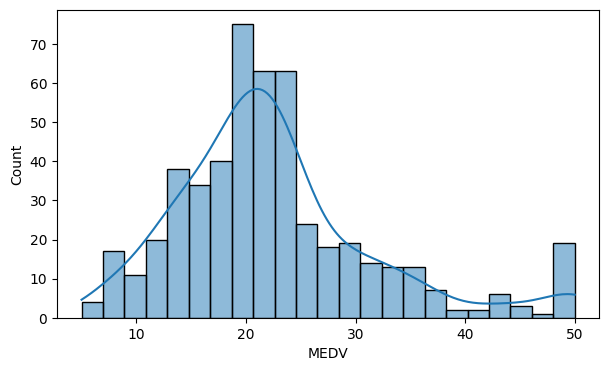

In [8]:
plt.figure(figsize = (7, 4))
sns.histplot(data = raw, x = 'MEDV', kde = True)
plt.show()

In [9]:
raw.shape

(506, 13)

In [10]:
# Subset data by MEDV < 50 

df = raw[~(raw['MEDV'] >= 50.0)]

df.shape

(490, 13)

### X and Y Variables 

In [32]:
Y = df['MEDV']
X = df.drop(columns = {'MEDV'})

X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [41]:
cols = X.columns
scaler = StandardScaler()
sX = scaler.fit(X)
Xdata = sX.transform(X)

X_ = pd.DataFrame(Xdata, columns = cols)

X_.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,490.0,-5.800349e-17,1.001022,-0.417401,-0.408711,-0.389720,0.000480,9.793471
ZN,490.0,-3.081435e-17,1.001022,-0.486924,-0.486924,-0.486924,0.060810,3.894946
INDUS,490.0,1.450087e-16,1.001022,-1.522252,-0.869218,-0.208845,1.025317,2.439981
CHAS,490.0,2.175131e-17,1.001022,-0.250812,-0.250812,-0.250812,-0.250812,3.987048
NOX,490.0,3.190192e-16,1.001022,-1.452426,-0.903393,-0.139895,0.597868,2.716791
RM,490.0,3.226444e-16,1.001022,-4.114256,-0.558594,-0.092679,0.509638,3.884451
AGE,490.0,1.740105e-16,1.001022,-2.323674,-0.843366,0.302851,0.909724,1.127416
DIS,490.0,-2.465148e-16,1.001022,-1.279783,-0.817665,-0.265025,0.654752,3.933963
RAD,490.0,1.160070e-16,1.001022,-0.980635,-0.635109,-0.519934,1.668395,1.668395
TAX,490.0,0.000000e+00,1.001022,-1.316322,-0.760911,-0.464592,1.536675,1.804702


### Check Variance Inflation Factor 

In [42]:
print(checking_vif(X_))

    feature       VIF
0      CRIM  1.769903
1        ZN  2.293591
2     INDUS  3.990472
3      CHAS  1.060322
4       NOX  4.380602
5        RM  1.864864
6       AGE  3.104171
7       DIS  3.974846
8       RAD  7.326510
9       TAX  8.783459
10  PTRATIO  1.708870
11    LSTAT  3.076944


In [43]:
X_ = X_.drop(columns = {'TAX'})

In [45]:
print(checking_vif(X_))

    feature       VIF
0      CRIM  1.769629
1        ZN  2.171311
2     INDUS  3.300537
3      CHAS  1.039985
4       NOX  4.350789
5        RM  1.857897
6       AGE  3.103433
7       DIS  3.974620
8       RAD  2.784538
9   PTRATIO  1.698415
10    LSTAT  3.076731


### Linear Regression 

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y, test_size = 0.3)

In [47]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [48]:
Y_pred = lm.predict(X_test)

Text(0, 0.5, 'Y pred')

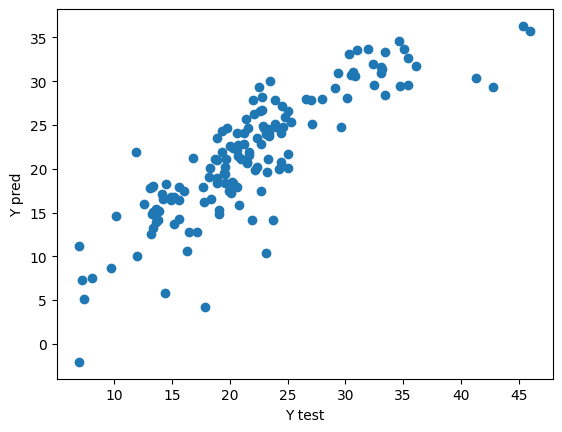

In [52]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')

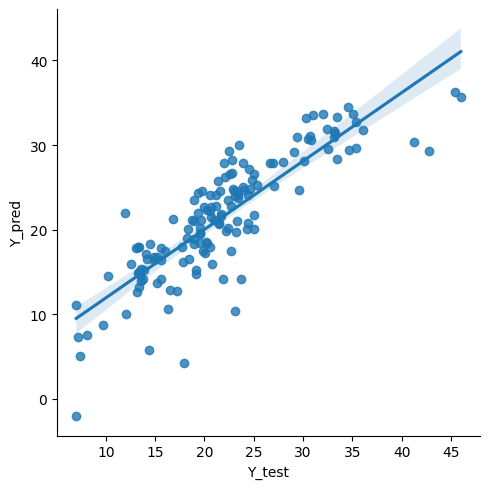

In [85]:
Y_test_ = pd.DataFrame(np.array(Y_test), columns = ["Y_test"])
Y_pred_ = pd.DataFrame(np.array(Y_pred), columns = ["Y_pred"])

YY = pd.concat([Y_test_, Y_pred_], axis = 1)

sns.lmplot(data = YY, x = 'Y_test', y = 'Y_pred')

## Assumptions of Linear Regression 

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### 1. Residuals 

In [89]:
lm_resids = (Y_test - Y_pred)
np.mean(lm_resids)

0.33084549706992733

### 2. Homogeneity of Variance 

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [90]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [91]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(Y_train, X_train)

lzip(name, test)

[('F statistic', 1.0300412450958134), ('p-value', 0.425688159979061)]

**Fail to reject the null, thus, residuals are homoscedastic.** 

### 3. Linearity of Variables 

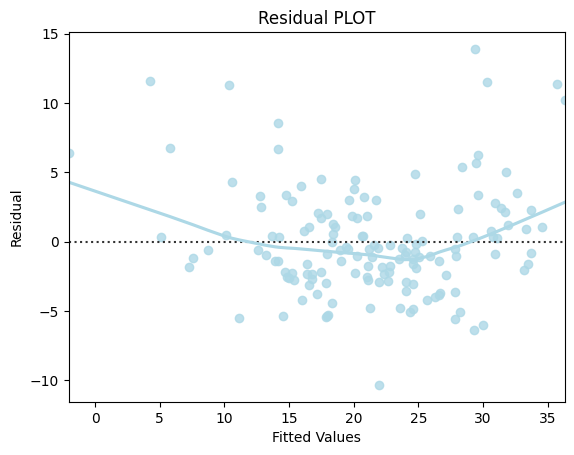

In [92]:

# sns.set_style("whitegrid")
sns.residplot(x = Y_pred, y = lm_resids, color = "lightblue", lowess = True) 

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

### 4. Normality of Error Terms 

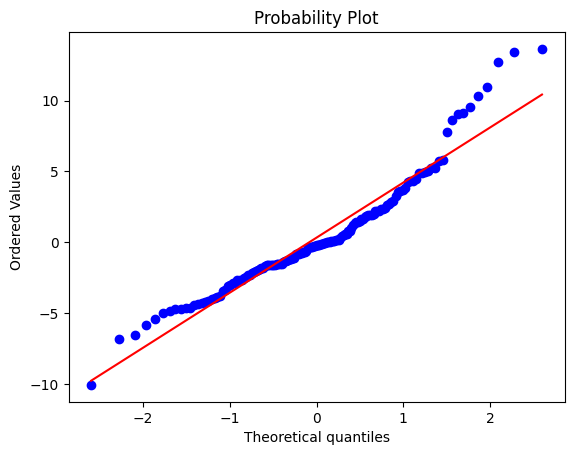

In [93]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(lm_resids, dist = "norm", plot = pylab)

plt.show()